In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
files = glob.glob(os.getcwd()+'\dataset\\'+'*.csv')
df_list = []

for file in files:
    data = pd.read_csv(file,usecols=['Close','Date'], parse_dates=True)
    mask = (data['Date'] > '2018-01-01') & (data['Date'] <= '2020-12-31')
    data = data.loc[mask]
    data = data.set_index('Date');
    df_list.append(data)
stocks = pd.concat(df_list,axis=1)
stocks.columns = ["adani","asian","axis","bajajauto","bajajfs","bajajfin","airtel",
              "bpcl","britannia","cipla", "coalind", "divislab", "drreddy","eichermot",
              "gail", "grasim", "hcl", "hdfc", "hdfcbk", "hdfclife", "hero", "hindalco", 
              "hindu", "icici", "indus", "infy", "ioc", "itc", "jsw", "kotak", "lt", "mm", 
              "maruti", "nestle", "ntpc", "ongc", "powergrid", "rel", "sbilife","sbibk", 
              "shreecem", "sunpharma", "tatam", "tatas", "tcs", "techm", "titan", "ultracem", 
              "upl", "wit"]
print(stocks.head)


<bound method NDFrame.head of              adani    asian    axis  bajajauto  bajajfs  bajajfin  airtel  \
2018-01-02  397.40  1142.75  559.50    3294.75  5101.10   1724.65  516.55   
2018-01-03  407.65  1141.90  560.45    3241.05  5099.45   1715.30  518.20   
2018-01-04  409.85  1172.05  559.90    3264.45  5062.55   1754.00  523.00   
2018-01-05  423.80  1185.25  563.25    3279.85  5127.20   1814.50  540.00   
2018-01-08  422.90  1182.00  565.45    3275.75  5221.25   1836.85  516.35   
...            ...      ...     ...        ...      ...       ...     ...   
2020-12-24  478.55  2648.25  610.20    3374.75  8992.55   5184.90  517.30   
2020-12-28  483.55  2683.90  617.65    3414.70  8995.05   5204.10  521.60   
2020-12-29  483.40  2696.80  630.20    3431.55  8976.05   5200.50  520.25   
2020-12-30  485.40  2734.40  625.10    3448.15  8961.70   5334.15  516.15   
2020-12-31  483.75  2764.50  620.45    3444.05  8906.35   5295.20  509.70   

              bpcl  britannia   cipla  ...  s

In [3]:
stocks.to_csv('dataset.csv')

In [4]:
log_ret=np.log(stocks/stocks.shift(1))

np.random.seed(42)
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(50))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [5]:
d = {'Company':stocks.columns,'Weights':all_weights[sharpe_arr.argmax()]}
df_w = pd.DataFrame(d)
df_w.columns = ['Company','Weights']
print(df_w)
df_w.to_csv('weights.csv')

      Company   Weights
0       adani  0.013575
1       asian  0.003254
2        axis  0.013271
3   bajajauto  0.010486
4     bajajfs  0.025115
5    bajajfin  0.032004
6      airtel  0.028545
7        bpcl  0.003125
8   britannia  0.032093
9       cipla  0.035881
10    coalind  0.022397
11   divislab  0.033001
12    drreddy  0.034324
13  eichermot  0.014164
14       gail  0.000666
15     grasim  0.012541
16        hcl  0.002893
17       hdfc  0.011915
18     hdfcbk  0.014260
19   hdfclife  0.012821
20       hero  0.044601
21   hindalco  0.004231
22      hindu  0.026682
23      icici  0.027097
24      indus  0.013902
25       infy  0.036885
26        ioc  0.008067
27        itc  0.008712
28        jsw  0.024056
29      kotak  0.028498
30         lt  0.006039
31         mm  0.021363
32     maruti  0.017347
33     nestle  0.037319
34       ntpc  0.011072
35       ongc  0.009707
36  powergrid  0.045028
37        rel  0.027351
38    sbilife  0.022912
39      sbibk  0.009733
40   shreecem  0

In [6]:
max_sr_vol = vol_arr[sharpe_arr.argmax()]
max_sr_ret = ret_arr[sharpe_arr.argmax()]

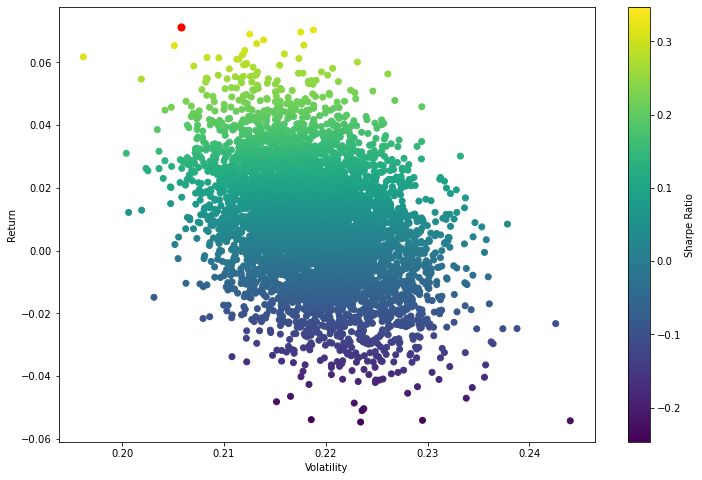

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.savefig('Sharpe.png')
plt.show()
